In [1]:
import sys
import numpy as np 
import matplotlib.pyplot as plt
import random as rn

In [2]:
# Author: Frank de Veld
# Code for a self-supervised neural network for gravity data interpretation, training on many samples, alternative loss function
# Version: 1.0
# Date: August 26th, 2020

class Station_point:
    def __init__(self, x, z, R, rho, q, m):
        G = 6.67408 *10**-11
        self.A = 4/3*np.pi*G*rho*R**3
        self.g = self.A*z**m/(x**2+z**2)**q
    def norm_g(self, g0):
        self.g0 = self.g/g0

def Measurement_generation(R,rho,m,q,z,Num_points):
    Centre_x = 0
    Centre_y = 0
    p0 = Station_point(0,z,R,rho,q,m)
    SD_x = 50
    
    Input_data_list_NN = [[0 for x in range (0,2)] for y in range(0,Num_points)]
    Station_points_list = [0 for x in range (0,Num_points)]

    for a in range (0,Num_points):
        Ran_x = np.abs(SD_x*np.random.randn())
        p = Station_point(Ran_x,z,R,rho,q,m)
        p.norm_g(p0.g)
        Input_data_list_NN[a][0] = Ran_x
        Input_data_list_NN[a][1] = p.g0
        Station_points_list[a] = p
    
    Max_x = 0
    for a in range (0,Num_points):
        if (np.max(Input_data_list_NN[a][0]) > Max_x):
            Max_x = np.max(Input_data_list_NN[a][0])
#     for a in range (0,Num_points):
#         Input_data_list_NN[a][0] = Input_data_list_NN[a][0]/Max_x 
    
    return [Input_data_list_NN,Max_x]     

# sample sample
Maxest_x = 0
Maxest_z = 0
SD_z = 150

Num_configs = 100
Num_samples = 15

X_array_train = [0 for a in range(0,round(0.65*Num_configs))]
y_array_train = [0 for a in range(0,round(0.65*Num_configs))]

X_array_valid = [0 for a in range(0,round(0.15*Num_configs))]
y_array_valid = [0 for a in range(0,round(0.15*Num_configs))]

X_array_test = [0 for a in range(0,round(0.2*Num_configs))]
y_array_test = [0 for a in range(0,round(0.2*Num_configs))]

q_options = [1/2,1,3/2]
index = 0
for a in range(0,Num_configs):
    ran_z = np.abs(SD_z*np.random.rand())
    ran_q_index = np.round(np.abs(2*np.random.rand()))
    ran_q = q_options[np.int(ran_q_index)]
    R = 10
    rho = 2500
    m = 1
    if ran_q==1/2:
        m = -1
    [X,Max_x] = Measurement_generation(R,rho,m,ran_q,ran_z,Num_samples)
    if (Max_x > Maxest_x):
        Maxest_x = Max_x
    if (ran_z > Maxest_z):
        Maxest_z = ran_z
    
    y = [[0 for x in range (0,2)] for y in range(0,Num_samples)]
    for x in range(0,Num_samples):
        y[x][0] = ran_z
        y[x][1] = ran_q
    
    if (a < round(0.65*Num_configs)):
        X_array_train[a] = X
        y_array_train[a] = y
    elif (a < round(0.8*Num_configs)):
        X_array_valid[a-round(0.65*Num_configs)] = X
        y_array_valid[a-round(0.65*Num_configs)] = y 
    else:
        X_array_test[a-round(0.8*Num_configs)] = X
        y_array_test[a-round(0.8*Num_configs)] = y
    
for a in range(0,Num_configs):
    for b in range(0,Num_samples):
        if (a < round(0.65*Num_configs)):
            X_array_train[a][b][0] = X_array_train[a][b][0]/Maxest_x
            y_array_train[a][b][0] = y_array_train[a][b][0]/Maxest_z
        elif (a < round(0.8*Num_configs)):
            X_array_valid[a-round(0.65*Num_configs)][b][0] = X_array_valid[a-round(0.65*Num_configs)][b][0]/Maxest_x
            y_array_valid[a-round(0.65*Num_configs)][b][0] = y_array_valid[a-round(0.65*Num_configs)][b][0]/Maxest_z
        else:
            X_array_test[a-round(0.8*Num_configs)][b][0] = X_array_test[a-round(0.8*Num_configs)][b][0]/Maxest_x
            y_array_test[a-round(0.8*Num_configs)][b][0] = y_array_test[a-round(0.8*Num_configs)][b][0]/Maxest_z
              

features_train = X_array_train
features_valid = X_array_valid
features_test = X_array_test
              
labels_train = y_array_train
labels_valid = y_array_valid
labels_test = y_array_test

# # Load the Features; list of Time of Flight (0th column), Departure time (1st column) and Arrival time (2nd column)
# # Time of Flight in seconds, Departure time in seconds since 1/1/2020 1:30 PM, Arrival time in seconds since 1/1/2020 1:30 PM
# features=np.loadtxt("Total_Features.txt")
# # Load the Labels; list of Delta V needed at Earth and Delta V needed at Mars
# # Optionally: sum them for a different label
# labels=np.loadtxt("Total_Labels.txt")

# data = np.array(features_train).reshape((65,15,2))
# with open('Training features no noise.txt', 'w') as outfile:
#     outfile.write('# Array shape: {0}\n'.format(data.shape))
#     for data_slice in data:
#         np.savetxt(outfile, data_slice, fmt='%-7.9f')
#         outfile.write('# New slice\n')
        
# data = np.array(features_valid).reshape((15,15,2))
# with open('Validation features no noise.txt', 'w') as outfile:
#     outfile.write('# Array shape: {0}\n'.format(data.shape))
#     for data_slice in data:
#         np.savetxt(outfile, data_slice, fmt='%-7.9f')
#         outfile.write('# New slice\n')
        
# data = np.array(features_test).reshape((20,15,2))
# with open('Test features no noise.txt', 'w') as outfile:
#     outfile.write('# Array shape: {0}\n'.format(data.shape))
#     for data_slice in data: 
#         np.savetxt(outfile, data_slice, fmt='%-7.9f')
#         outfile.write('# New slice\n')
        
# data = np.array(labels_train).reshape((65,15,2))
# with open('Training labels no noise.txt', 'w') as outfile:
#     outfile.write('# Array shape: {0}\n'.format(data.shape))
#     for data_slice in data: 
#         np.savetxt(outfile, data_slice, fmt='%-7.9f')
#         outfile.write('# New slice\n')
        
# data = np.array(labels_valid).reshape((15,15,2))
# with open('Validation labels no noise.txt', 'w') as outfile:
#     outfile.write('# Array shape: {0}\n'.format(data.shape))
#     for data_slice in data: 
#         np.savetxt(outfile, data_slice, fmt='%-7.9f')
#         outfile.write('# New slice\n')
        
# data = np.array(labels_test).reshape((20,15,2))
# with open('Test labels no noise.txt', 'w') as outfile:
#     outfile.write('# Array shape: {0}\n'.format(data.shape))
#     for data_slice in data:
#         np.savetxt(outfile, data_slice, fmt='%-7.9f')
#         outfile.write('# New slice\n')

In [143]:
class Station_point:
    def __init__(self, x, z, R, rho, q, m):
        G = 6.67408 *10**-11
        self.A = 4/3*np.pi*G*rho*R**3
        self.g = self.A*z**m/(x**2+z**2)**q
    def norm_g(self, g0):
        self.g0 = self.g/g0

def Measurement_generation(R,rho,m,q,z,Num_points):
    Centre_x = 0
    Centre_y = 0
    p0 = Station_point(0,z,R,rho,q,m)
    SD_x = 50
    
    Input_data_list_NN = [[0 for x in range (0,2)] for y in range(0,Num_points)]
    Station_points_list = [0 for x in range (0,Num_points)]

    for a in range (0,Num_points):
        Ran_x = np.abs(SD_x*np.random.randn())
        p = Station_point(Ran_x,z,R,rho,q,m)
        p.norm_g(p0.g)
        Input_data_list_NN[a][0] = Ran_x
        Input_data_list_NN[a][1] = p.g0 + rn.uniform(-1*0.05*np.abs(p.g0), 1*0.05*np.abs(p.g0))
        Station_points_list[a] = p
    
    Max_x = 0
    for a in range (0,Num_points):
        if (np.max(Input_data_list_NN[a][0]) > Max_x):
            Max_x = np.max(Input_data_list_NN[a][0])
#     for a in range (0,Num_points):
#         Input_data_list_NN[a][0] = Input_data_list_NN[a][0]/Max_x 
    
    return [Input_data_list_NN,Max_x]     

# sample sample
Maxest_x = 0
Maxest_z = 0
SD_z = 150

Num_configs = 100
Num_samples = 15

X_array_train = [0 for a in range(0,round(0.65*Num_configs))]
y_array_train = [0 for a in range(0,round(0.65*Num_configs))]

X_array_valid = [0 for a in range(0,round(0.15*Num_configs))]
y_array_valid = [0 for a in range(0,round(0.15*Num_configs))]

X_array_test = [0 for a in range(0,round(0.2*Num_configs))]
y_array_test = [0 for a in range(0,round(0.2*Num_configs))]

q_options = [1/2,1,3/2]
index = 0
for a in range(0,Num_configs):
    ran_z = np.abs(SD_z*np.random.rand())
    ran_q_index = np.round(np.abs(2*np.random.rand()))
    ran_q = q_options[np.int(ran_q_index)]
    R = 10
    rho = 2500
    m = 1
    if ran_q==1/2:
        m = -1
    [X,Max_x] = Measurement_generation(R,rho,m,ran_q,ran_z,Num_samples)
    if (Max_x > Maxest_x):
        Maxest_x = Max_x
    if (ran_z > Maxest_z):
        Maxest_z = ran_z
    
    y = [[0 for x in range (0,2)] for y in range(0,Num_samples)]
    for x in range(0,Num_samples):
        y[x][0] = ran_z
        y[x][1] = ran_q
    
    if (a < round(0.65*Num_configs)):
        X_array_train[a] = X
        y_array_train[a] = y
    elif (a < round(0.8*Num_configs)):
        X_array_valid[a-round(0.65*Num_configs)] = X
        y_array_valid[a-round(0.65*Num_configs)] = y 
    else:
        X_array_test[a-round(0.8*Num_configs)] = X
        y_array_test[a-round(0.8*Num_configs)] = y
    
for a in range(0,Num_configs):
    for b in range(0,Num_samples):
        if (a < round(0.65*Num_configs)):
            X_array_train[a][b][0] = X_array_train[a][b][0]/Maxest_x
            y_array_train[a][b][0] = y_array_train[a][b][0]/Maxest_z
        elif (a < round(0.8*Num_configs)):
            X_array_valid[a-round(0.65*Num_configs)][b][0] = X_array_valid[a-round(0.65*Num_configs)][b][0]/Maxest_x
            y_array_valid[a-round(0.65*Num_configs)][b][0] = y_array_valid[a-round(0.65*Num_configs)][b][0]/Maxest_z
        else:
            X_array_test[a-round(0.8*Num_configs)][b][0] = X_array_test[a-round(0.8*Num_configs)][b][0]/Maxest_x
            y_array_test[a-round(0.8*Num_configs)][b][0] = y_array_test[a-round(0.8*Num_configs)][b][0]/Maxest_z
              

    
# print(X_array)
# print(y_array)
# print(Maxest_x)

features_train = X_array_train
features_valid = X_array_valid
features_test = X_array_test
              
labels_train = y_array_train
labels_valid = y_array_valid
labels_test = y_array_test

data = np.array(features_train).reshape((65,15,2))
with open('Training features 5p noise.txt', 'w') as outfile:
    outfile.write('# Array shape: {0}\n'.format(data.shape))
    for data_slice in data:
        np.savetxt(outfile, data_slice, fmt='%-7.9f')
        outfile.write('# New slice\n')
        
data = np.array(features_valid).reshape((15,15,2))
with open('Validation features 5p noise.txt', 'w') as outfile:
    outfile.write('# Array shape: {0}\n'.format(data.shape))
    for data_slice in data:
        np.savetxt(outfile, data_slice, fmt='%-7.9f')
        outfile.write('# New slice\n')
        
data = np.array(features_test).reshape((20,15,2))
with open('Test features 5p noise.txt', 'w') as outfile:
    outfile.write('# Array shape: {0}\n'.format(data.shape))
    for data_slice in data: 
        np.savetxt(outfile, data_slice, fmt='%-7.9f')
        outfile.write('# New slice\n')
        
data = np.array(labels_train).reshape((65,15,2))
with open('Training labels 5p noise.txt', 'w') as outfile:
    outfile.write('# Array shape: {0}\n'.format(data.shape))
    for data_slice in data: 
        np.savetxt(outfile, data_slice, fmt='%-7.9f')
        outfile.write('# New slice\n')
        
data = np.array(labels_valid).reshape((15,15,2))
with open('Validation labels 5p noise.txt', 'w') as outfile:
    outfile.write('# Array shape: {0}\n'.format(data.shape))
    for data_slice in data: 
        np.savetxt(outfile, data_slice, fmt='%-7.9f')
        outfile.write('# New slice\n')
        
data = np.array(labels_test).reshape((20,15,2))
with open('Test labels 5p noise.txt', 'w') as outfile:
    outfile.write('# Array shape: {0}\n'.format(data.shape))
    for data_slice in data:
        np.savetxt(outfile, data_slice, fmt='%-7.9f')
        outfile.write('# New slice\n')

Iteration 1
Error 2.8402016878339773
Error_val 0.1922794881256319
Iteration 2
Error 1.7311112160323725
Error_val 0.09742176883596328
Iteration 3
Error 1.5121650034570324
Error_val 0.10025628686390824
Iteration 4
Error 1.4648100258979215
Error_val 0.10368902511562686
Iteration 5
Error 1.4334309051245653
Error_val 0.10613328418423225
Iteration 6
Error 1.4651484836994524
Error_val 0.09797249069905355
Iteration 7
Error 1.4639951752227527
Error_val 0.12215377435251368
Iteration 8
Error 1.445253160041127
Error_val 0.07878855952391996
Iteration 9
Error 1.4113994972276682
Error_val 0.08223512699480555
Iteration 10
Error 1.3897296776924082
Error_val 0.11034870341809452


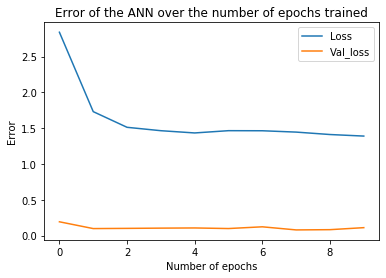

In [4]:
# Self-supervised, many samples at same time

class Layer_Dense:
    def __init__(self, Number_of_inputs, Number_of_neurons):
        self.weights = np.abs(0.05 * np.random.randn(Number_of_inputs, Number_of_neurons))

        # This creates a matrix of weight factors connecting every neuron from the previous layer
        # to every neuron of the current layer
        # Initialisation of weights is best done with low values in order to prevent 'value explosion'
        self.biases = np.zeros((1, Number_of_neurons))
        # Each neuron also has a bias to vary
    def intermediate(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        # This intermediate value is the input for the activation function

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
    def derivative(self, inputs):
        self.diffoutput = np.ones(len(inputs))
        for a in range(0, len(inputs)):
            if inputs[a] > 0:
                self.diffoutput[a] = 1 #[1 for x in range(0, len(inputs))] 
            else:
                self.diffoutput[a] = 0 # [0 for x in range(0, len(inputs))] 
        
class Activation_Linear:
    def forward(self, inputs):
        self.output = np.array(inputs)  
    def derivative(self, inputs):
        self.diffoutput = [1 for x in range(0, len(inputs))] 

class Station_point:
    def __init__(self, x, z, R, rho, q, m):
        G = 6.67408 *10**-11
        self.A = 4/3*np.pi*G*rho*R**3
        self.g = self.A*z**m/(x**2+z**2)**q
    def norm_g(self, g0):
        self.g0 = self.g/g0

#X = features
Max_x = Maxest_x
Max_z = Maxest_z

Num_Inputs = 2
Num_Hidden_Neurons_1 = 64
Num_Outputs = 2

        
Hidden_Layer_1 = Layer_Dense(Num_Inputs,Num_Hidden_Neurons_1)
# Creates a hidden layer. The first value is the number of neurons in the previous layer (now input, so 1),
# the second value is the number of neurons in the current hidden layer (which can be any number)
Activation_Function_Hidden_Layer_1 = Activation_ReLU()
# Choose for all neurons of the layer a certain activation function

Final_Layer = Layer_Dense(Num_Hidden_Neurons_1,Num_Outputs) # Input: number of neurons hidden layer, number of outputs (=2)

Activation_Function_Final_Layer = Activation_Linear()


Hidden_Layer_1_Pseudo = Layer_Dense(Num_Inputs,Num_Hidden_Neurons_1)
# Creates a hidden layer. The first value is the number of neurons in the previous layer (now input, so 1),
# the second value is the number of neurons in the current hidden layer (which can be any number)
Activation_Function_Hidden_Layer_1_Pseudo = Activation_ReLU()
# Choose for all neurons of the layer a certain activation function

Final_Layer_Pseudo = Layer_Dense(Num_Hidden_Neurons_1,Num_Outputs) # Input: number of neurons hidden layer, number of outputs (=2)

Activation_Function_Final_Layer_Pseudo = Activation_Linear()

Learning_rate = 0.25

def NN_test(X,Max_x,Max_z):
    # Same structure as the actual neural network, but a local copy to check without changing the original structure
    Hidden_Layer_1_Pseudo.intermediate(X)
    Activation_Function_Hidden_Layer_1_Pseudo.forward(Hidden_Layer_1_Pseudo.output)
    Output_Hidden_Layer_1_Pseudo = Activation_Function_Hidden_Layer_1_Pseudo.output
    Final_Layer_Pseudo.intermediate(Output_Hidden_Layer_1_Pseudo)
    Activation_Function_Final_Layer_Pseudo.forward(Final_Layer_Pseudo.output)
    Output_Final_Layer_Pseudo = Activation_Function_Final_Layer_Pseudo.output
    NN_y = [Output_Final_Layer_Pseudo[0][0],Output_Final_Layer_Pseudo[0][1]]
    Error = np.abs(((NN_y[0]*Max_z)**2/((NN_y[0]*Max_z)**2+(X[0]*Max_x)**2))**(3/2*NN_y[1])-X[1])
    return np.array([Error, NN_y])
    
def Security_update(X):
    # A feature I thought can be useful, but also influences the weight updates, so not in use at the moment
    Hidden_Layer_1_Pseudo.intermediate(X)
    Activation_Function_Hidden_Layer_1_Pseudo.forward(Hidden_Layer_1_Pseudo.output)
    Output_Hidden_Layer_1_Pseudo = Activation_Function_Hidden_Layer_1_Pseudo.output
    Final_Layer_Pseudo.intermediate(Output_Hidden_Layer_1_Pseudo)
    Activation_Function_Final_Layer_Pseudo.forward(Final_Layer_Pseudo.output)
    Output_Final_Layer_Pseudo = Activation_Function_Final_Layer_Pseudo.output

def dEdOut1(xobs,znn,qnn):
    # Derivative of the error to znn
    return (qnn*xobs**2*(znn**2/(xobs**2+znn**2))**(qnn+1))/(znn**3) 

def dEdOut2(xobs,znn,qnn):
    # Derivative of the error to qnn
    return (znn**2/(xobs**2+znn**2))**qnn*np.log(znn**2/(xobs**2+znn**2)) 

def NN_Training(X,Learning_rate,Error_array,Max_x,Max_z):
    Hidden_Layer_1.intermediate(X)
    # Create the input for the activation function by creating a property of the hidden layer

    Activation_Function_Hidden_Layer_1.forward(Hidden_Layer_1.output) # 'Hidden_Layer_1.output' is the values of the neurons
    # Calculate the (output) value of every neuron in layer 1 by performing the activation function

    Output_Hidden_Layer_1 = Activation_Function_Hidden_Layer_1.output # 'Activation_Function_Hidden_Layer_1.output' is the value of the output of the neurons

    Final_Layer.intermediate(Output_Hidden_Layer_1) # Which is the input for the next layer of neurons

    Activation_Function_Final_Layer.forward(Final_Layer.output)

    Output_Final_Layer = Activation_Function_Final_Layer.output
    
    # Make a copy for testing
    Hidden_Layer_1_Pseudo.intermediate(X)
    Activation_Function_Hidden_Layer_1_Pseudo.forward(Hidden_Layer_1_Pseudo.output) 
    Output_Hidden_Layer_1_Pseudo = Activation_Function_Hidden_Layer_1_Pseudo.output
    Final_Layer_Pseudo.intermediate(Output_Hidden_Layer_1_Pseudo) 
    Activation_Function_Final_Layer_Pseudo.forward(Final_Layer_Pseudo.output)
    Output_Final_Layer_Pseudo = Activation_Function_Final_Layer_Pseudo.output
    
    
    NN_y = [0 for x in range(0, len(X))]
    Error = [0 for x in range(0, len(X))]
    
    for x in range(0, len(X)):
        NN_y[x] = Output_Final_Layer[x]
        for y in range(0, len(X)):
            Temp_Error = ((NN_y[x][0]*Max_z)**2/((NN_y[x][0]*Max_z)**2+(X[y][0]*Max_x)**2))**(3/2*NN_y[x][1])-X[y][1]
            Error[x] = Error[x] + Temp_Error
        
    
    ##
    ####### Input Layer -> Hidden Layer weights update
    ##
    
    for a in range(0,len(X[0])): # loop over the size of one input tuple; usually 2
        
        dEdG = [0 for x in range(0,len(X))]
        dGdOut = [0 for x in range(0,len(X))]
        dOutdIn = [0 for x in range(0,len(X))]
        dIndOutHid = [0 for x in range(0,len(X))]
        dEdOutHid = [0 for x in range(0,len(X))]
        dOutHiddInHid = [0 for x in range(0,len(X))]
        dInHiddW = [0 for x in range(0,len(X))]
        dEdW = [0 for x in range(0,len(X))]
        
        for b in range(0,len(X)): # Loop over the size of the input batch
        
            dEdG[b] = Error[b]

            dGdOut[b] = np.array([dEdOut1(X[b][0],NN_y[b][0],NN_y[b][1]),dEdOut2(X[b][0],NN_y[b][0],NN_y[b][1])])

            Activation_Function_Final_Layer.derivative(Final_Layer.output[b]) # value of the derivatives at the values of the output neurons
            # 1xn matrix, n=number of outputs

            dOutdIn[b] = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
            #dOutdIn = Final_Layer.output[0] # Element 0 because this is a list of lists
            # 1xn matrix, n=number of outputs

            dIndOutHid[b] = Final_Layer.weights
            #dIndW[b] = Hidden_Layer_1.output[b] # Element 0 because this is a list of lists
            
            dEdOutHid[b] = np.zeros(Num_Hidden_Neurons_1)
            # Interim result; result of the n 'ways' you can get to the weight in consideration
                        
            for c in range(0,Num_Hidden_Neurons_1):
                dEdOutHid[b][c] = np.sum(dEdG[b]*dGdOut[b]*dOutdIn[b]*dIndOutHid[b][c]) # Compute every interim result
          
            Activation_Function_Hidden_Layer_1.derivative(Hidden_Layer_1.output[b]) # 1st neuron hidden layer value
            # This 'generates' derivatives in the layers, but doesn't retrieve them

            dOutHiddInHid[b] = Activation_Function_Hidden_Layer_1.diffoutput # Derivative of the output to the input; derivative of activation function
            # 1xn matrix, n=number of outputs

            dInHiddW[b] = X[b][a] # Derivative of the input to the weights, which is the input
            # 1xn matrix, n=number of outputs
            
            dEdW[b] = dEdOutHid[b]*dOutHiddInHid[b]*dInHiddW[b]
            #dEdW[b] = np.sum(dEdG[b]*dGdOut[b]*dOutdIn[b])*dIndW[b]*dOutdInHid[b]*dInHiddW[b]
        
        dEdWAv = [0 for x in range(0,Num_Hidden_Neurons_1)]
        for x in range(0,Num_Hidden_Neurons_1):
            Tot_update = 0
            for y in range(0,len(X)): # Number of inputs in one batch
                Tot_update = Tot_update + dEdW[y][x]
            dEdWAv[x] = Tot_update/len(X)
        
        for b in range (0, Num_Hidden_Neurons_1):
            Old_weight = Hidden_Layer_1.weights[a][b]
            Hidden_Layer_1.weights[a][b] = Hidden_Layer_1.weights[a][b] - Learning_rate*dEdWAv[b]
            Hidden_Layer_1_Pseudo.weights[a][b] = Hidden_Layer_1.weights[a][b] - Learning_rate*dEdWAv[b]
            
            Old_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
            New_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
            NN_z_new = [0 for x in range(0,len(X))] # Number of inputs in one batch
            NN_q_new = [0 for x in range(0,len(X))] # Number of inputs in one batch
            
            for c in range(0,len(X)): # Number of inputs in one batch 
                Old_error[c] = Error[c]
                New_error[c] = NN_test(X[c],Max_x,Max_z)[0]
                NN_z_new[c] = NN_test(X[c],Max_x,Max_z)[1][0]
                NN_q_new[c] = NN_test(X[c],Max_x,Max_z)[1][1]
            
            Bad_improvement_bool = False
            
            if (np.any(np.array(NN_z_new)<0) or np.any(np.array(NN_q_new)<0)): # Might be a too harsh requirement
                Hidden_Layer_1.weights[a][b] = Old_weight
                Hidden_Layer_1_Pseudo.weights[a][b] = Old_weight
                Bad_improvement_bool = True
                
            if Bad_improvement_bool == True:
                Learning_rate = Learning_rate/1.0001
                
            # Security_update(X)
    
    ##
    ####### Hidden layer bias update
    ##
    
    dEdG = [0 for x in range(0,len(X))]
    dGdOut = [0 for x in range(0,len(X))]
    dOutdIn = [0 for x in range(0,len(X))]
    dIndOutHid = [0 for x in range(0,len(X))]
    dEdOutHid = [0 for x in range(0,len(X))]
    dOutHiddInHid = [0 for x in range(0,len(X))]
    dInHiddB = [0 for x in range(0,len(X))]
    dEdB = [0 for x in range(0,len(X))]
    
    for b in range(0,len(X)): # Loop over the size of the input batch
        
        dEdG[b] = Error[b] 

        dGdOut[b] = np.array([dEdOut1(X[b][0],NN_y[b][0],NN_y[b][1]),dEdOut2(X[b][0],NN_y[b][0],NN_y[b][1])])

        Activation_Function_Final_Layer.derivative(Final_Layer.output[b]) # value of the derivatives at the values of the output neurons
        # 1xn matrix, n=number of outputs

        dOutdIn[b] = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
        #dOutdIn = Final_Layer.output[0] # Element 0 because this is a list of lists
        # 1xn matrix, n=number of outputs

        dIndOutHid[b] = Final_Layer.weights
        #dIndW[b] = Hidden_Layer_1.output[b] # Element 0 because this is a list of lists

        dEdOutHid[b] = np.zeros(Num_Hidden_Neurons_1)
        # Interim result; result of the n 'ways' you can get to the weight in consideration

        for c in range(0,Num_Hidden_Neurons_1):
            dEdOutHid[b][c] = np.sum(dEdG[b]*dGdOut[b]*dOutdIn[b]*dIndOutHid[b][c]) # Compute every interim result

        Activation_Function_Hidden_Layer_1.derivative(Hidden_Layer_1.output[b]) # 1st neuron hidden layer value
        # This 'generates' derivatives in the layers, but doesn't retrieve them

        dOutHiddInHid[b] = Activation_Function_Hidden_Layer_1.diffoutput # Derivative of the output to the input; derivative of activation function
        # 1xn matrix, n=number of outputs

        dInHiddB[b] = np.ones(Num_Hidden_Neurons_1) # Derivative of the input to the bias, which is an additive constant
        # 1xn matrix, n=number of outputs
        
        dEdB[b] = dEdOutHid[b]*dOutHiddInHid[b]*dInHiddB[b]
    
    dEdBAv = [0 for x in range(0,Num_Hidden_Neurons_1)]
    for x in range(0,Num_Hidden_Neurons_1):
        Tot_update = 0
        for y in range(0,len(X)): # Number of inputs in one batch
            Tot_update = Tot_update + dEdB[y][x]
        dEdBAv[x] = Tot_update/len(X)
    
    for a in range(0, Num_Hidden_Neurons_1):
        Old_bias = Hidden_Layer_1.biases[0][a]
        Hidden_Layer_1.biases[0][a] = Hidden_Layer_1.biases[0][a] - Learning_rate*dEdBAv[a]
        Hidden_Layer_1_Pseudo.biases[0][a] = Hidden_Layer_1.biases[0][a] - Learning_rate*dEdBAv[a]
        
        Old_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
        New_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
        NN_z_new = [0 for x in range(0,len(X))] # Number of inputs in one batch
        NN_q_new = [0 for x in range(0,len(X))] # Number of inputs in one batch
        
        for c in range(0,len(X)): # Number of inputs in one batch
            Old_error[c] = Error[c]
            New_error[c] = NN_test(X[c],Max_x,Max_z)[0]
            NN_z_new[c] = NN_test(X[c],Max_x,Max_z)[1][0]
            NN_q_new[c] = NN_test(X[c],Max_x,Max_z)[1][1]
        
        Bad_improvement_bool = False
        
        if (np.any(np.array(NN_z_new)<0) or np.any(np.array(NN_q_new)<0)): # Might be a too harsh requirement
            Hidden_Layer_1.biases[0][a] = Old_bias
            Hidden_Layer_1_Pseudo.biases[0][a] = Old_bias
            Bad_improvement_bool = True

        if Bad_improvement_bool == True:
            Learning_rate = Learning_rate/1.0001
    
    ##
    ####### Hidden Layer -> Final Layer weights update
    ##
    
    for a in range(0,Num_Hidden_Neurons_1):
        
        dEdG = [0 for x in range(0,len(X))]
        dGdOut = [0 for x in range(0,len(X))]
        dOutdIn = [0 for x in range(0,len(X))]
        dIndW = [0 for x in range(0,len(X))]
        dOutdInHid = [0 for x in range(0,len(X))]
        dInHiddW = [0 for x in range(0,len(X))]
        dEdW = [0 for x in range(0,len(X))]
        
        for b in range(0,len(X)): # Loop over the number of inputs in the input batch

            dEdG[b] = Error[b]  

            dGdOut[b] = np.array([dEdOut1(X[b][0],NN_y[b][0],NN_y[b][1]),dEdOut2(X[b][0],NN_y[b][0],NN_y[b][1])])

            Activation_Function_Final_Layer.derivative(Final_Layer.output[b]) # value of the derivatives at the values of the output neurons
            # This 'generates' derivatives in the layers, but doesn't retrieve them

            dOutdIn[b] = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
            # 1xn matrix, n=number of outputs
            
            dIndW[b] = Hidden_Layer_1.output[b][a]

            dEdW[b] = dEdG[b]*dGdOut[b]*dOutdIn[b]*dIndW[b]
            
        dEdWAv = [0 for x in range(0,Num_Outputs)]
        for x in range(0,Num_Outputs):
            Tot_update = 0
            for y in range(0,len(X)): # Number of inputs in one batch
                Tot_update = Tot_update + dEdW[y][x]
            dEdWAv[x] = Tot_update/len(X)
        
        for b in range (0, Num_Outputs):
            Old_weight = Final_Layer.weights[a][b]
            Final_Layer.weights[a][b] = Final_Layer.weights[a][b] - Learning_rate*dEdWAv[b]
            Final_Layer_Pseudo.weights[a][b] = Final_Layer.weights[a][b] - Learning_rate*dEdWAv[b]
            
            Old_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
            New_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
            NN_y_new = [0 for x in range(0,len(X))] # Number of inputs in one batch
            
            for c in range(0,len(X)): # Number of inputs in one batch 
                Old_error[c] = Error[c]
                New_error[c] = NN_test(X[c],Max_x,Max_z)[0]
                NN_z_new[c] = NN_test(X[c],Max_x,Max_z)[1][0]
                NN_q_new[c] = NN_test(X[c],Max_x,Max_z)[1][1]
                
            
            Bad_improvement_bool = False
            
            if (np.any(np.array(NN_z_new)<0) or np.any(np.array(NN_q_new)<0)): # Might be a too harsh requirement
                Final_Layer.weights[a][b] = Old_weight
                Final_Layer_Pseudo.weights[a][b] = Old_weight
                Bad_improvement_bool = True
                
            if Bad_improvement_bool == True:
                Learning_rate = Learning_rate/1.0001
                
            # Security_update(X)
    
    ##
    ######## Output layer bias update
    ##
    
    dEdG = [0 for x in range(0,len(X))]
    dGdOut = [0 for x in range(0,len(X))]
    dOutdIn = [0 for x in range(0,len(X))]
    dIndB = [0 for x in range(0,len(X))]
    dEdB = [0 for x in range(0,len(X))]
    
    for b in range(0,len(X)): # Loop over the number of inputs in the input batch
    
        dEdG[b] = Error[b] 

        dGdOut[b] = np.array([dEdOut1(X[b][0],NN_y[b][0],NN_y[b][1]),dEdOut2(X[b][0],NN_y[b][0],NN_y[b][1])])

        Activation_Function_Final_Layer.derivative(Final_Layer.output[b]) # value of the derivatives at the values of the output neurons
        # This 'generates' derivatives in the layers, but doesn't retrieve them

        dOutdIn[b] = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
        # 1xn matrix, n=number of outputs

        dIndB[b] = np.ones(len(Final_Layer.output[b])) # Derivative of the input to the bias, which is an additive constant
        # 1xn matrix, n=number of outputs

        dEdB[b] = dEdG[b]*dGdOut[b]*dOutdIn[b]*dIndB[b] # Total derivative of the energy to the biases
        # 1xn matrix, n=number of outputs
    
    dEdBAv = [0 for x in range(0,Num_Outputs)]
    for x in range(0,Num_Outputs):
        Tot_update = 0
        for y in range(0,len(X)): # Number of inputs in one batch
            Tot_update = Tot_update + dEdB[y][x]
        dEdBAv[x] = Tot_update/len(X)
    
    # Updating of all the biases at once using the learning rate and the gradient
    
    for a in range(0, Num_Outputs):
        Old_bias = Final_Layer.biases[0][a]

        Final_Layer.biases[0][a] = Final_Layer.biases[0][a] - Learning_rate*dEdBAv[a]
        Final_Layer_Pseudo.biases[0][a] = Final_Layer.biases[0][a] - Learning_rate*dEdBAv[a]
 
        Old_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
        New_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
        NN_z_new = [0 for x in range(0,len(X))] # Number of inputs in one batch
        NN_q_new = [0 for x in range(0,len(X))]
            
        for c in range(0,len(X)): # Number of inputs in one batch 
            Old_error[c] = Error[c]
            New_error[c] = NN_test(X[c],Max_x,Max_z)[0]
            NN_z_new[c] = NN_test(X[c],Max_x,Max_z)[1][0]
            NN_q_new[c] = NN_test(X[c],Max_x,Max_z)[1][1]
        
        Bad_improvement_bool = False
        
        if (np.any(np.array(NN_z_new)<0) or np.any(np.array(NN_q_new)<0)): # Might be a too harsh requirement
            Final_Layer.biases[0][a] = Old_bias
            Final_Layer_Pseudo.biases[0][a] = Old_bias
            Bad_improvement_bool = True

        if Bad_improvement_bool == True:
            Learning_rate = Learning_rate/1.0001

        # Security_update(X)
    
#     print('Ending config:')
#     print('Weights 1', Hidden_Layer_1.weights)
#     print('Weights 2', Final_Layer.weights)
#     print('Biases 1', Hidden_Layer_1.biases)
#     print('Biases 2', Final_Layer.biases)
    
#     print('Output 1',Output_Hidden_Layer_1)
#     print('Output 2',Output_Final_Layer)
    
#     print(' ')
    
    #np.append(Error_array,Error_current_run)
    
    #return Error_array

    return [Learning_rate, np.sum(np.abs(Error))/len(Error)]
    

Num_epochs = 10
    
Error_array = np.ones(Num_epochs)
Error_array_val = np.ones(Num_epochs)
for a in range(0,Num_epochs):
    print('Iteration',a+1)
#     [Learning_rate,Error_epoch_1] = NN_Training(X[0],Learning_rate,Error_array,Max_x,80)
#     [Learning_rate,Error_epoch_2] = NN_Training(X[1],Learning_rate,Error_array,Max_x,80)
    #Error_array = NN_Training(X[1],y[1],Learning_rate,Error_array)
    Total_error = 0
    for b in range(0,len(features_train)):
        [Learning_rate,Error_epoch] = NN_Training(features_train[b],Learning_rate,Error_array,Max_x,Max_z)
        
        Total_error = Total_error + Error_epoch
    Error_array[a] = (Total_error)/len(features_train)
    print('Error',Error_array[a])
    
    Total_error_val = 0
    for b in range(0,len(features_valid)):
        Temp_error = 0
        for c in range(0,len(features_valid[0])):
            index = round(rn.uniform(0,len(features_valid[0])-1))
            [Error_epoch,Output] = NN_test(features_valid[b][index],Max_x,Max_z)
            Temp_error = Temp_error + Error_epoch
        Total_error_val = Total_error_val + Temp_error/len(features_valid[0])
    Error_array_val[a] = (Total_error_val)/len(features_valid)
    print('Error_val',Error_array_val[a])
    
plt.plot(Error_array)
plt.plot(Error_array_val)
plt.legend(['Loss','Val_loss'],loc='upper right')
plt.title('Error of the ANN over the number of epochs trained')
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.show()



1.647675717135159
0.3245630981858488


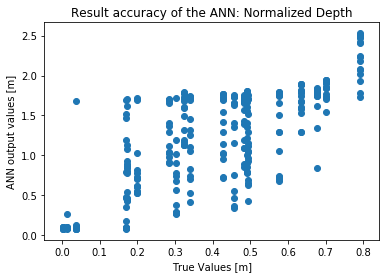

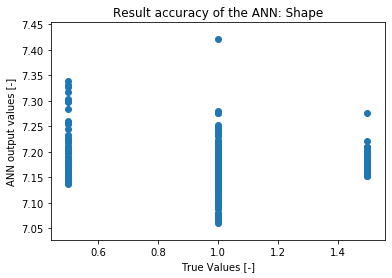

In [5]:
Depth_predicted = np.ones(len(features_test)*len(features_test[0]))
Depth_actual = np.ones(len(features_test)*len(features_test[0]))
Shape_predicted = np.ones(len(features_test)*len(features_test[0]))
Shape_actual = np.ones(len(features_test)*len(features_test[0]))

Total_spread = 0
Total_spread_std = 0
for a in range(0,len(features_test)):
    max_depth = 0
    min_depth = 0
    for b in range(0,len(features_test[0])):
        [Error_epoch,Output] = NN_test(features_test[a][b],Max_x,Max_z)
        Depth_predicted[a*len(features_test[0])+b] = Output[0]
        Depth_actual[a*len(features_test[0])+b]=labels_test[a][b][0]
        Shape_predicted[a*len(features_test[0])+b] = Output[1]
        Shape_actual[a*len(features_test[0])+b]=labels_test[a][b][1]
        
        if (Depth_predicted[a*len(features_test[0])+b] > max_depth):
            max_depth = Depth_predicted[a*len(features_test[0])+b]
        if (Depth_predicted[a*len(features_test[0])+b] < min_depth):
            min_depth = Depth_predicted[a*len(features_test[0])+b]
        
    Depth_spread = max_depth - min_depth
    Total_spread = Total_spread + Depth_spread
    
    Spread_std = np.std(Depth_predicted[a*len(features_test[0]):(a*len(features_test[0])+len(features_test[0])-1)])
    Total_spread_std = Total_spread_std + Spread_std
    
Average_spread = Total_spread/len(features_test)
print(Average_spread)
Average_spread_std = Total_spread_std/len(features_test)
print(Average_spread_std)

plt.scatter(Depth_actual,Depth_predicted)
plt.title('Result accuracy of the ANN: Normalized Depth')
plt.xlabel('True Values [m]')
plt.ylabel('ANN output values [m]')
plt.show()

plt.scatter(Shape_actual,Shape_predicted)
plt.title('Result accuracy of the ANN: Shape')
plt.xlabel('True Values [-]')
plt.ylabel('ANN output values [-]')
plt.show()

# np.savetxt('Depth actual test 50x15.txt',Depth_actual)
# np.savetxt('Depth predicted test 50x15.txt',Depth_predicted)
# np.savetxt('Shape actual test 50x15.txt',Shape_actual)
# np.savetxt('Shape predicted test 50x15.txt',Shape_predicted)

1.7651908535929282
0.2914545119260174


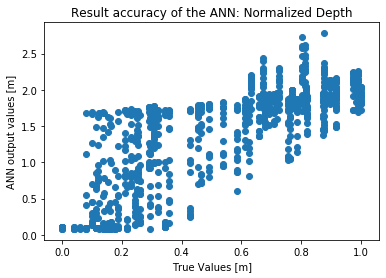

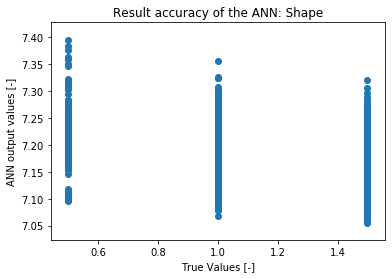

In [6]:
Depth_predicted = np.ones(len(features_train)*len(features_train[0]))
Depth_actual = np.ones(len(features_train)*len(features_train[0]))
Shape_predicted = np.ones(len(features_train)*len(features_train[0]))
Shape_actual = np.ones(len(features_train)*len(features_train[0]))

Total_spread = 0
Total_spread_std = 0
for a in range(0,len(features_train)):
    max_depth = 0
    min_depth = 0
    for b in range(0,len(features_train[0])):
        [Error_epoch,Output] = NN_test(features_train[a][b],Max_x,Max_z)
        Depth_predicted[a*len(features_train[0])+b] = Output[0]
        Depth_actual[a*len(features_train[0])+b]=labels_train[a][b][0]
        Shape_predicted[a*len(features_train[0])+b] = Output[1]
        Shape_actual[a*len(features_train[0])+b]=labels_train[a][b][1]
        
        if (Depth_predicted[a*len(features_train[0])+b] > max_depth):
            max_depth = Depth_predicted[a*len(features_train[0])+b]
        if (Depth_predicted[a*len(features_train[0])+b] < min_depth):
            min_depth = Depth_predicted[a*len(features_train[0])+b]
        
    Depth_spread = max_depth - min_depth
    Total_spread = Total_spread + Depth_spread
    
    Spread_std = np.std(Depth_predicted[a*len(features_train[0]):(a*len(features_train[0])+len(features_train[0])-1)])
    Total_spread_std = Total_spread_std + Spread_std
    
Average_spread = Total_spread/len(features_train)
print(Average_spread)
Average_spread_std = Total_spread_std/len(features_train)
print(Average_spread_std)

plt.scatter(Depth_actual,Depth_predicted)
plt.title('Result accuracy of the ANN: Normalized Depth')
plt.xlabel('True Values [m]')
plt.ylabel('ANN output values [m]')
plt.show()

plt.scatter(Shape_actual,Shape_predicted)
plt.title('Result accuracy of the ANN: Shape')
plt.xlabel('True Values [-]')
plt.ylabel('ANN output values [-]')
plt.show()


# np.savetxt('Depth actual train 10x15.txt',Depth_actual)
# np.savetxt('Depth predicted train 10x15.txt',Depth_predicted)
# np.savetxt('Shape actual train 10x15.txt',Shape_actual)
# np.savetxt('Shape predicted train 10x15.txt',Shape_predicted)